# Assignment 7 : Clustering - Airlines data

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
df = pd.read_excel("EastWestAirlines_1.xlsx")

In [4]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [7]:
df.shape

(3999, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
df.rename(columns = {'Award?':'Award'}, inplace = True)
df.rename(columns = {'ID#':'ID'}, inplace = True)

In [11]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


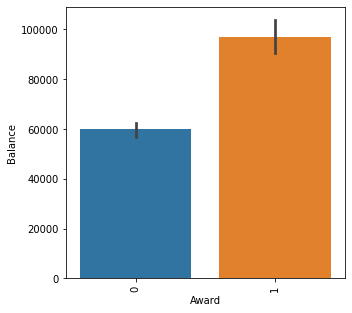

In [15]:
plt.figure(figsize = (5,5))
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [16]:
corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID                  -0.243737
Name: Balance, dtype: float64

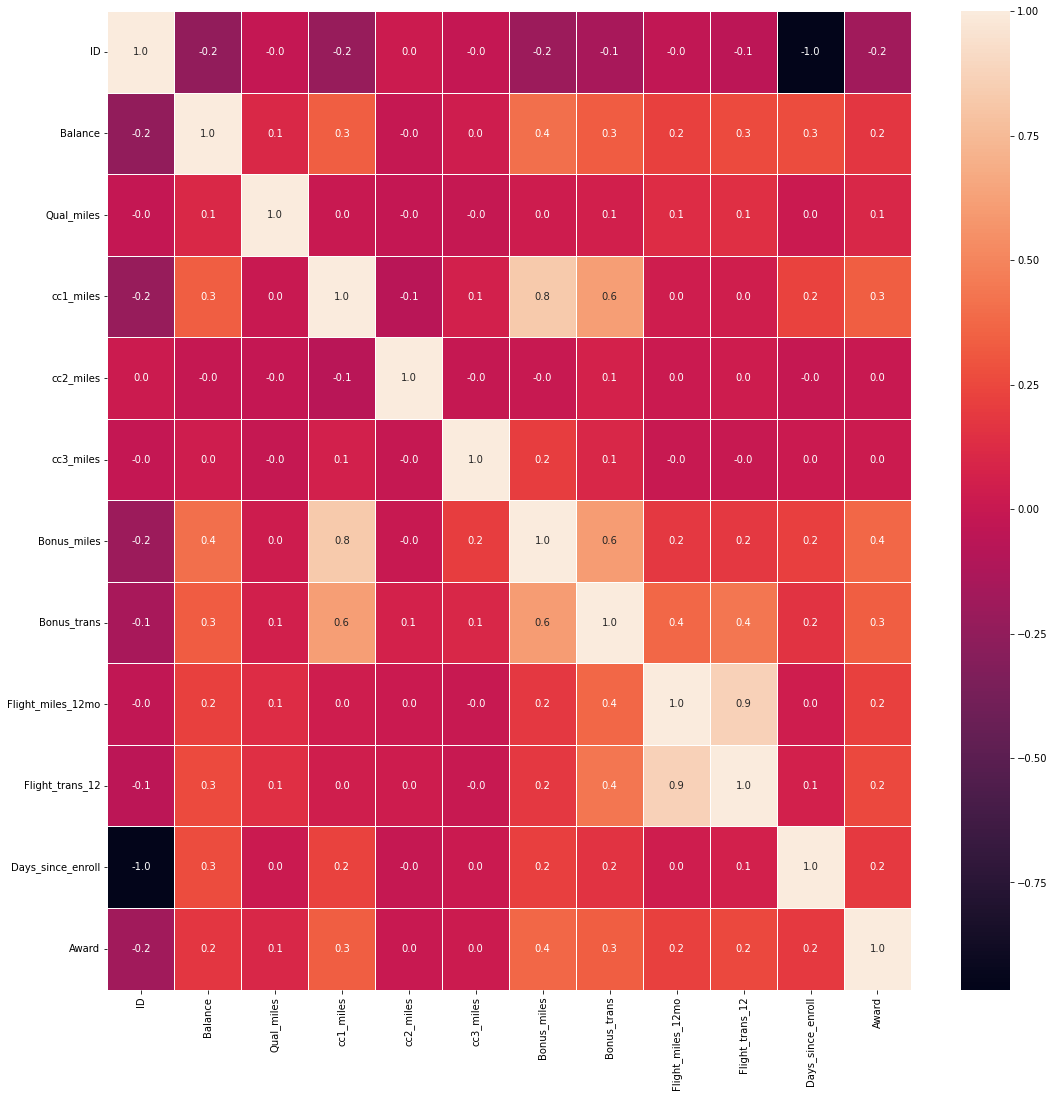

In [17]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

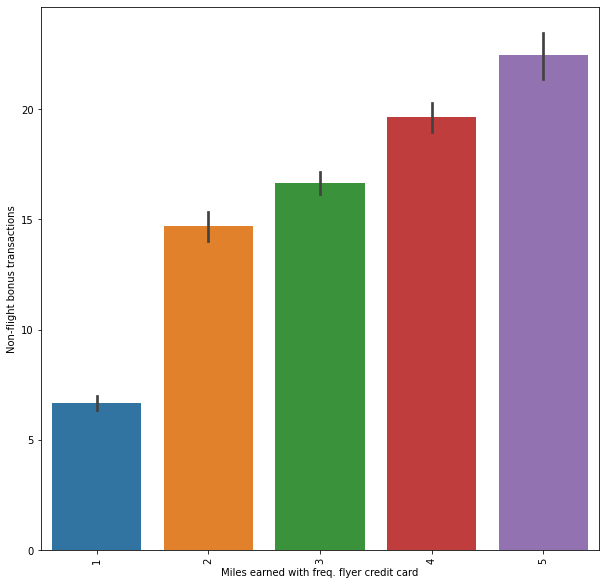

In [18]:
plt.figure(figsize = (10,10))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

ID


c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


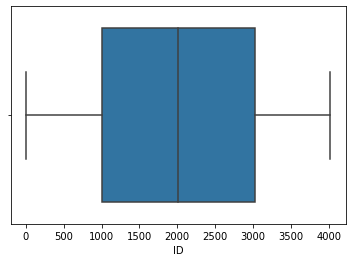

Balance


c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


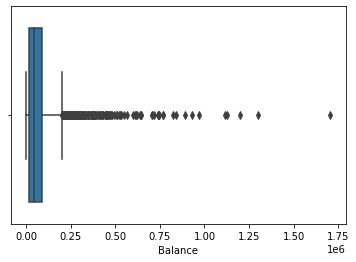

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Qual_miles


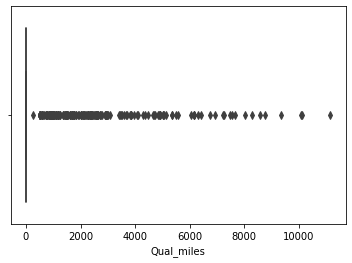

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cc1_miles


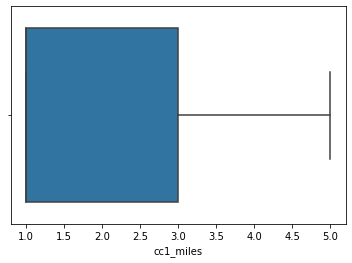

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cc2_miles


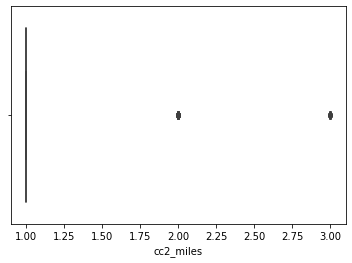

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cc3_miles


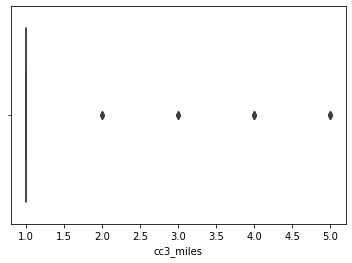

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Bonus_miles


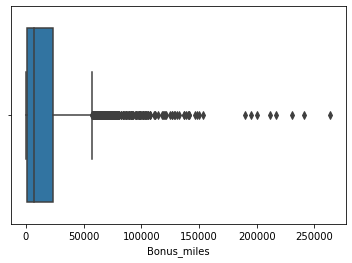

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Bonus_trans


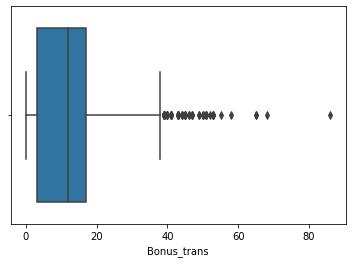

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Flight_miles_12mo


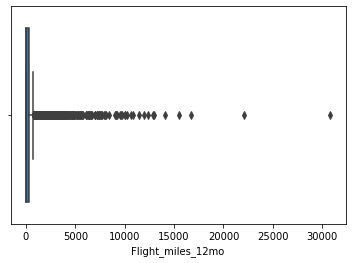

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Flight_trans_12


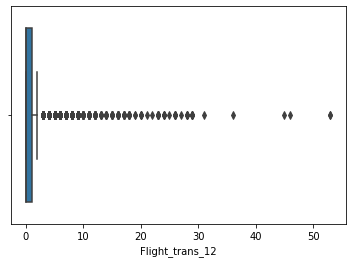

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Days_since_enroll


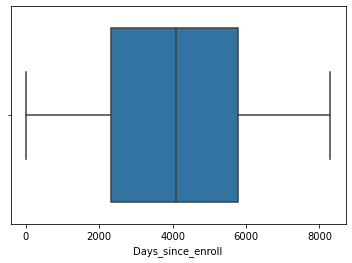

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Award


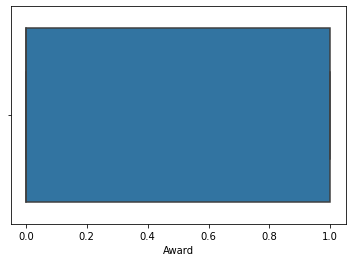

In [20]:
for n in df.columns:
    print(n)
    sns.boxplot(df[n])
    plt.show()

<AxesSubplot:>

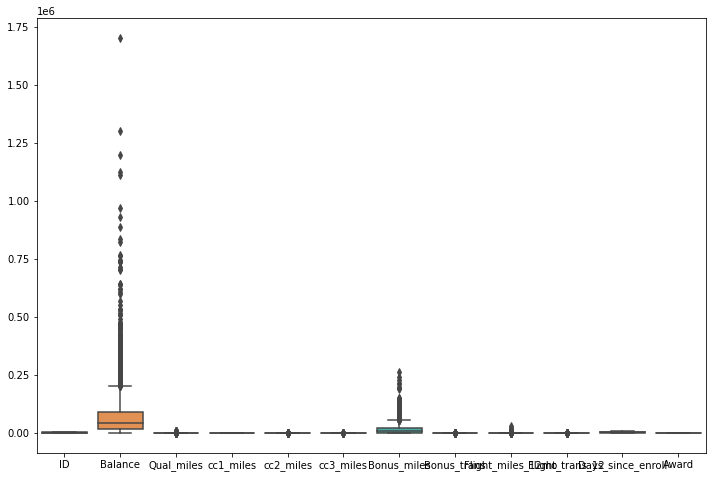

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

<AxesSubplot:>

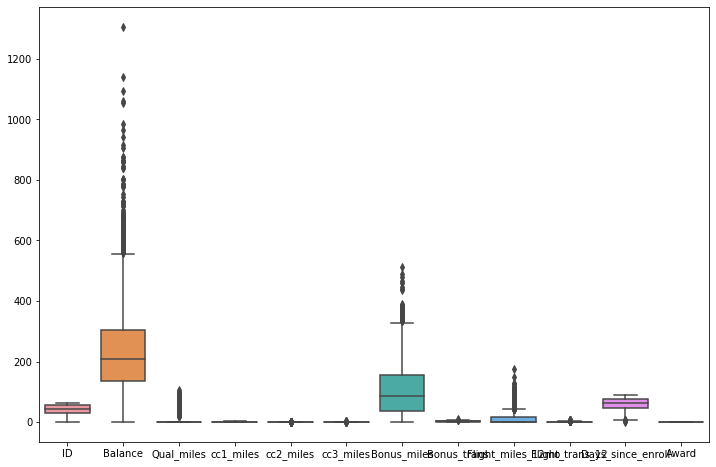

In [22]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

In [25]:
q1 = df['Balance'].quantile(0.25)
q3 = df['Balance'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df1= df[(df['Balance']>ll)&(df['Balance']<ul)]
df1.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

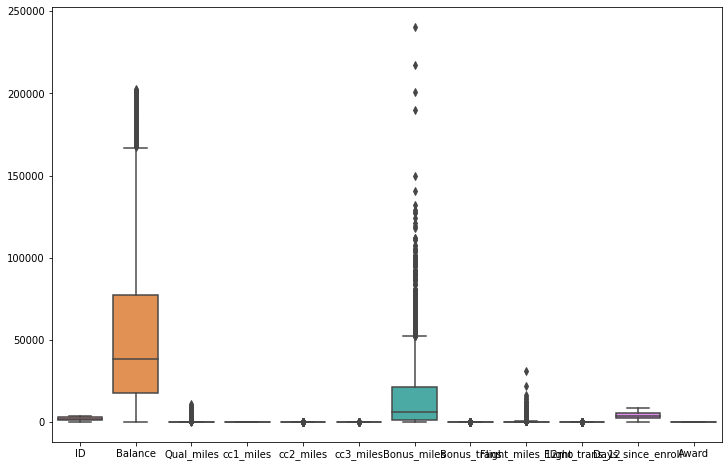

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1)

In [27]:

q1 = df['Bonus_miles'].quantile(0.25)
q3 = df['Bonus_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['Bonus_miles']>ll)&(df1['Bonus_miles']<ul)]

<AxesSubplot:>

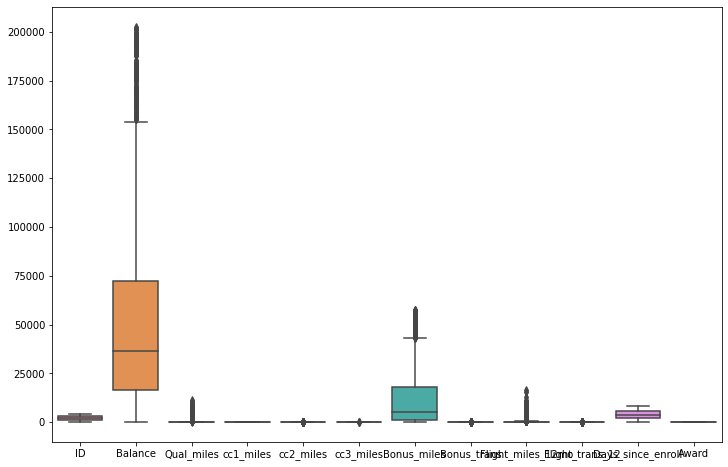

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df2)

In [29]:
# Removing outliers from Flight_miles_12mo

q1 = df['Flight_miles_12mo'].quantile(0.25)
q3 = df['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df3 = df2[(df2['Flight_miles_12mo']>ll)&(df2['Flight_miles_12mo']<ul)]

<AxesSubplot:>

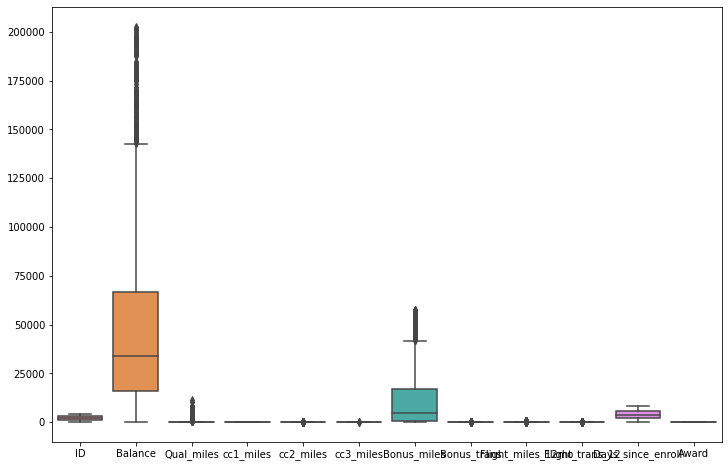

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df3)

In [35]:
df3

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [36]:
df3.iloc[:,1:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [37]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df3.iloc[:,1:])

In [38]:
scaled_df

array([[-0.4537746 , -0.15023499, -0.70923455, ..., -0.39176935,
         1.50378589, -0.64237673],
       [-0.66052249, -0.15023499, -0.70923455, ..., -0.39176935,
         1.48814238, -0.64237673],
       [-0.14684725, -0.15023499, -0.70923455, ..., -0.39176935,
         1.52040713, -0.64237673],
       ...,
       [ 0.60224504, -0.15023499,  1.02135348, ..., -0.39176935,
        -1.23285115,  1.55671891],
       [ 0.16783982, -0.15023499, -0.70923455, ...,  0.93913201,
        -1.23334   , -0.64237673],
       [-1.03754293, -0.15023499, -0.70923455, ..., -0.39176935,
        -1.23480658, -0.64237673]])

In [39]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [43]:
df3["Cluster"] = kmeans.predict(scaled_df)

C:\Users\ankit\AppData\Local\Temp\ipykernel_34040\360215563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Cluster"] = kmeans.predict(scaled_df)


In [44]:
df3

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


# Elbow

In [45]:
kmeans.inertia_ #Within a cluster sum 0f square

23457.478891757513

In [46]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    dist = kmeans.inertia_
    wcss.append(dist)

In [47]:
wcss

[34155.00000000005,
 27267.405706572295,
 23457.478891757517,
 20736.007291542355,
 18191.906417313083,
 16316.422846838695,
 15481.825416164553,
 13448.520372586347,
 12413.45809047351,
 11516.927637560797]

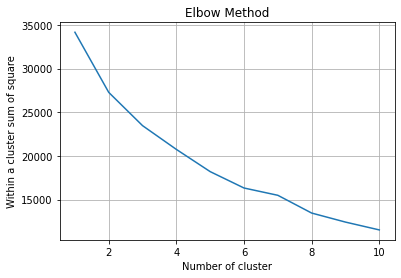

In [48]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Within a cluster sum of square")
plt.grid()

In [49]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(6, random_state=0)
clusters_new.fit(scaled_df)

KMeans(n_clusters=6, random_state=0)

In [50]:
clusters_new.labels_

array([1, 1, 1, ..., 4, 0, 1])

In [52]:
#Assign clusters to the data set
df3['clusterid_new'] = clusters_new.labels_

C:\Users\ankit\AppData\Local\Temp\ipykernel_34040\3562292018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clusterid_new'] = clusters_new.labels_


In [53]:
df3

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0


In [54]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 3.13774159e-01,  2.43783727e-02, -1.19797207e-01,
        -9.91444397e-02, -2.70646154e-02, -6.00708547e-02,
         4.99187778e-02,  2.35391531e+00,  2.08508522e+00,
         5.08919685e-02,  3.34333323e-01],
       [-4.13710575e-01, -1.01800288e-01, -6.35667040e-01,
        -9.91444397e-02, -2.70646154e-02, -5.89526296e-01,
        -5.07203728e-01, -3.79566698e-01, -3.32498442e-01,
        -1.65585992e-01, -3.15501322e-01],
       [-1.56940500e-01, -1.50234988e-01, -6.32885076e-01,
         8.95507571e+00, -2.70646154e-02,  9.79318078e-02,
         6.35988265e-01,  2.62296400e-02,  1.17104696e-01,
        -4.72511570e-02, -6.02631778e-02],
       [ 9.30763322e-01, -1.50234988e-01,  1.56059468e-01,
        -9.91444397e-02,  2.79848123e+01,  1.72232690e+00,
         5.96675950e-01, -4.14956883e-01, -3.91769353e-01,
         1.98204379e-01, -6.42376729e-01],
       [ 6.20602611e-01, -8.82279452e-02,  1.23538056e+00,
        -9.91444397e-02, -2.70646154e-02,  1.09343911e+00,
  

In [55]:
df3

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0


In [56]:
#What is avarage of top10 for cluster 1 = 86.6
df3.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2078.433243,61180.416894,111.648501,1.681199,1.000000,1.000000,10222.874659,9.970027,470.697548,1.861035,4027.994550,0.444142,1.991826
1,1,2295.071718,29867.466165,30.969346,1.085020,1.000000,1.000000,2909.942741,5.524002,6.016194,0.044534,3585.172354,0.148641,1.000000
2,2,2316.558824,40919.558824,0.000000,1.088235,2.323529,1.000000,12405.235294,14.647059,75.000000,0.382353,3827.235294,0.264706,1.058824
3,3,2164.333333,87737.333333,0.000000,2.000000,1.000000,2.666667,34841.666667,14.333333,0.000000,0.000000,4329.333333,0.000000,0.000000
4,4,1791.063694,74387.160297,39.647558,3.247346,1.000000,1.000000,26155.357749,16.642251,30.376858,0.130573,4529.766454,0.496815,0.000000
5,5,2476.333333,73624.466667,5546.666667,1.833333,1.000000,1.000000,12351.233333,9.733333,157.233333,0.600000,3216.366667,0.333333,0.933333


In [57]:
df3[df3['clusterid_new']==1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1


In [58]:
df3[df3['clusterid_new']==0]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster,clusterid_new
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2,0
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,2,0
36,37,23193,0,1,1,1,650,4,550,3,7861,1,2,0
37,38,68666,0,1,1,1,350,2,350,2,7861,0,2,0
40,41,34616,0,1,1,1,1750,4,500,1,7850,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,3921,44324,0,1,1,1,650,4,650,4,1583,0,2,0
3901,3924,69954,0,1,1,1,8500,5,500,1,1578,0,2,0
3923,3946,9312,0,1,1,1,3405,8,250,1,1527,1,2,0
3930,3953,40424,0,4,1,1,44110,26,343,3,1523,1,2,0


In [59]:
df3["clusterid_new"].value_counts()

1    1729
4     942
0     367
2      34
5      30
3       3
Name: clusterid_new, dtype: int64

In [60]:
y = kmeans.predict(scaled_df)

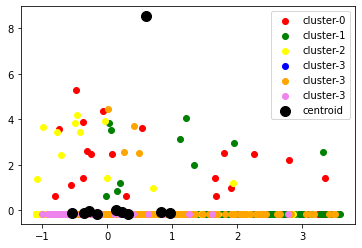

In [61]:
plt.scatter(scaled_df[y==0,0],scaled_df[y==0,1],label="cluster-0",color="red")
plt.scatter(scaled_df[y==1,0],scaled_df[y==1,1],label="cluster-1",color="green")
plt.scatter(scaled_df[y==2,0],scaled_df[y==2,1],label="cluster-2",color="yellow")
plt.scatter(scaled_df[y==3,0],scaled_df[y==3,1],label="cluster-3",color="blue")
plt.scatter(scaled_df[y==4,0],scaled_df[y==4,1],label="cluster-3",color="orange")
plt.scatter(scaled_df[y==5,0],scaled_df[y==5,1],label="cluster-3",color="violet")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,color="black",label="centroid")

plt.legend()
plt.show()